#### Package import

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Data import

In [88]:
df = pd.read_excel("시험사출+성형조건 (1).xlsx")

#### 데이터 타입 확인

In [78]:
df.info(verbose=True)

# 1146개의 행과 66개의 열을 갖는 데이터

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1146 entries, 0 to 1145
Data columns (total 67 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   사출일자           1145 non-null   object 
 1   설비/호기          1146 non-null   object 
 2   재료명            1141 non-null   object 
 3   Grade          1145 non-null   object 
 4   금형구조           717 non-null    object 
 5   모델             1146 non-null   object 
 6   색상             1095 non-null   object 
 7   차수             986 non-null    float64
 8   작업방법           611 non-null    object 
 9   품명             1146 non-null   object 
 10  금형번호           1146 non-null   object 
 11  cavity         1146 non-null   object 
 12  제품중량           623 non-null    float64
 13  런너중량           611 non-null    float64
 14  s/c time(sec)  551 non-null    float64
 15  사출속도.1         1145 non-null   float64
 16  사출속도.2         1145 non-null   float64
 17  사출속도.3         1101 non-null   float64
 18  사출속도.4  

### 차원축소

In [89]:
# 1~4차 과정을 1차 과정으로 통합하여 차원 축소
df=df[["사출일자", "설비/호기", "재료명", "Grade", "금형구조", '모델', '색상', '차수', '작업방법', '품명',
       '금형번호', 'cavity', '제품중량', '런너중량', 's/c time(sec)', '사출속도.1','사출압력.1',
   '사출위치.1','사출시간.1','보압속도.1','보압압력.1', '보압위치.1', '보압시간.1', '계량속도.1',
   '계량압력.1', '계량위치.1', '계량위치(석백)',  '계량시간.1', '금형온도(상부)',
       '금형온도(하부)', '냉각', '쿠션', '실린더온도.노즐', '실린더온도.H1', '실린더온도.H2', '실린더온도.H3',
       '실린더온도.H4', '불량유무']]

In [90]:
df.rename(columns={"사출속도.1":"사출속도", "사출압력.1":"사출압력", "사출위치.1":"사출위치", "사출시간.1":"사출시간",
                  "보압속도.1":"보압속도", "보압압력.1":"보압압력", "보압위치.1":"보압위치", "보압시간.1":"보압시간",
                  "계량속도.1":"계량속도", "계량위치.1":"계량위치", "계량시간.1":"계량시간"}, inplace=True)

#### 결측치 확인

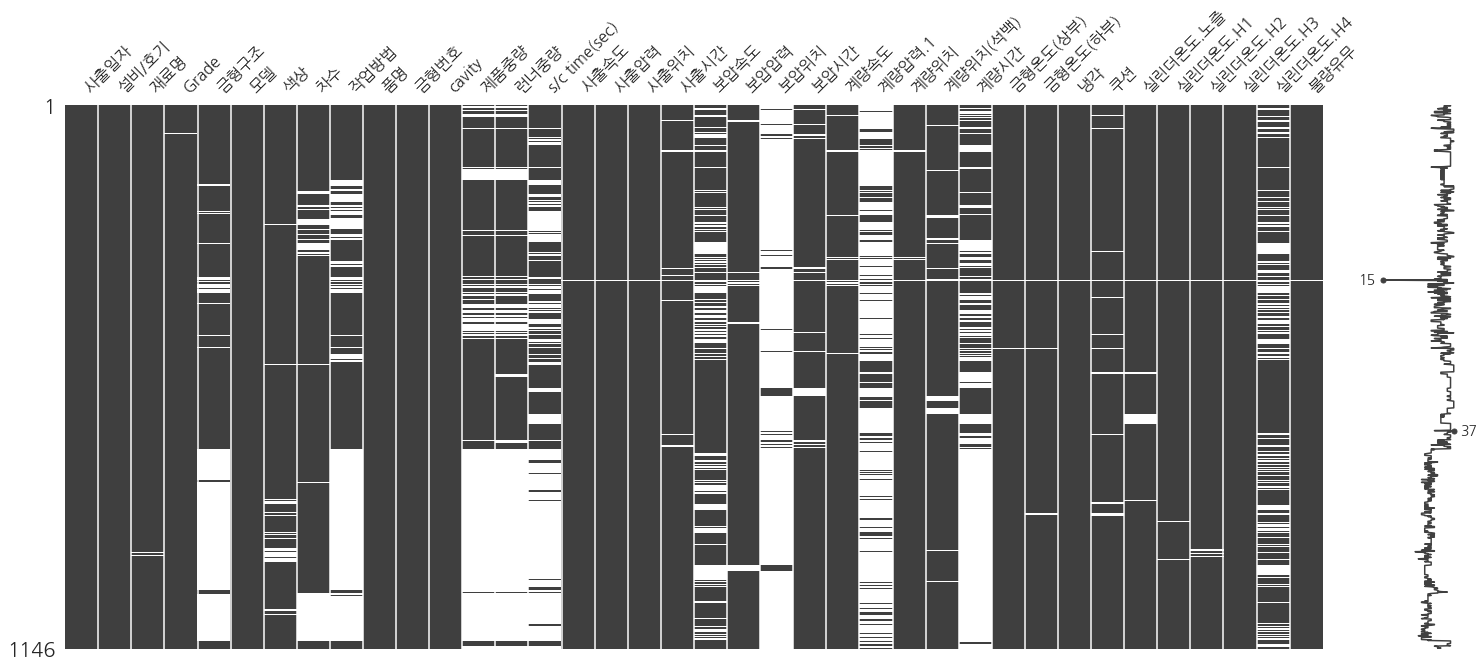

In [72]:
import missingno as msno
msno.matrix(df)
plt.show()

In [91]:
# 금형구조, 작업방법,제품중량, 런너중량, s/c time, 보압위치에 결측치 다수 -> drop
# 데이터를 잘 설명할 수 없을 것 같은 변수 사출일자, Grade, 차수, 금형번호 -> drop
df.drop(["금형구조", "작업방법", "제품중량", "런너중량", "s/c time(sec)", "보압위치", 
        "사출일자", "Grade", "차수", "금형번호"], axis=1, inplace=True)

In [92]:
# 설비/호기를 구분할 수 없도록 형식이 상이함 -> drop
df["설비/호기"].unique()

array(['4호기', 'JSW 100 TON(BL 4호기)', '2PL 10호기', '220ton/3호기', '10호기',
       '6호기', '7호기', '우진80 TON(8호기)', 'jsw100(5호기)', 'toyo50 TON(2호기)',
       '우진 8호기(80ton)', 'toyo50 TON(BL 1 호기)', '우진 80톤  1PL 7호기',
       '우진 80톤  1PL 8호기', 'TOYO 50톤  1PL 2호기', '우진 110톤  1PL 4호기',
       '우진 80톤  1PL 6호기', '우진 130 ton 18호기', '우진 130 ton 16호기',
       'TOYO 50톤  2호기', '우진 80톤  7호기', '우진 130톤  19호기', '우진 130톤  17호기',
       '우진 130톤  22호기', '우진 80톤  8호기', 'TOYO 50TON (2호기)',
       'WOOJIN 6호기 80 TON', '2호기', '4호기(우진 100 TON)', '2PL 8호기',
       '2PL 5호기', '2호기(LS350TON)', '8호기', '5호기', '19호기', '9호기',
       'TOYO 50톤  BL2호기', 'SUMITOMO 50톤  BL2호기', '우진 240ton (12호기)',
       '우진 100 ton(8호기)', '우진 80ton (7호기)', '우진 130ton (17호기)',
       'SUMITOMO 50TON(BL2)', 'toyo50 TON(비엘3호기)', '2PL 19호기',
       '우진 130 ton 비엘 5호기', '우진 130 ton 17호기', '우진 80 ton 8호기',
       '우진 100 ton 4호기', '우진 130TON 18호기', '14호기', '13호기', '11호기', '20호기',
       '18호기', '1호기', '3호기', '16호기', '9호기-우진NS130', '17호기',
    

In [93]:
df.drop(["설비/호기"], axis=1, inplace=True)

### 단위 변환 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


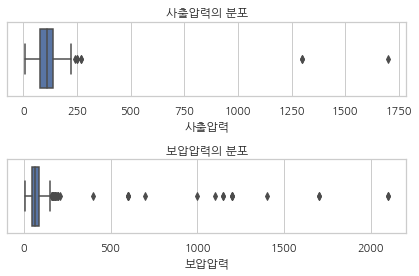

In [34]:
# 압력 변수에 이상치가 있다는 것 파악
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'
plt.subplot(2,1,1)
sns.boxplot("사출압력", data=df)
plt.title("사출압력의 분포")
plt.subplot(2,1,2)
sns.boxplot("보압압력", data=df)
plt.title("보압압력의 분포")
plt.tight_layout()

In [96]:
# 이 이상치는 엔지니어마다 단위를 다르게 입력해서 생긴 것이기에 단위를 변환해줌 (걍 0하나 빼줌)
pd.set_option('display.max_columns', None)
df[df["사출압력"]>1000]

,재료명,모델,색상,품명,cavity,사출속도,사출압력,사출위치,사출시간,보압속도,보압압력,보압시간,계량속도,계량압력.1,계량위치,계량위치(석백),계량시간,금형온도(상부),금형온도(하부),냉각,쿠션,실린더온도.노즐,실린더온도.H1,실린더온도.H2,실린더온도.H3,실린더온도.H4,불량유무
131,PC/ABS,JF AVN,KA02,KNOB BODY,1*2,60.0,1300.0,30.0,2.00,NaN,1000.0,1.0,200.0,NaN,10.0,5.0,NaN,60.0,60.0,15.0,8.82,260.0,265.0,260.0,250.0,NaN,0.0
132,PC/ABS,JF KEYBOARD,BK,KNOB BODY,1*2,60.0,1700.0,30.0,0.58,NaN,1100.0,1.0,200.0,NaN,10.0,5.0,NaN,55.0,55.0,15.0,8.96,260.0,265.0,260.0,250.0,NaN,1.0
133,PC,JF KBD,CDW63,REFLECTOR KNOB DOM,1*2,22.0,1300.0,22.0,5.00,20.0,1400.0,1.0,150.0,NaN,10.0,5.0,NaN,60.0,60.0,15.0,8.43,285.0,285.0,280.0,275.0,270.0,0.0


In [98]:
df["사출압력"] = df["사출압력"].replace(1300,130)
df["사출압력"] = df["사출압력"].replace(1700,170)

In [100]:
df[df["보압압력"]>1000]

,재료명,모델,색상,품명,cavity,사출속도,사출압력,사출위치,사출시간,보압속도,보압압력,보압시간,계량속도,계량압력.1,계량위치,계량위치(석백),계량시간,금형온도(상부),금형온도(하부),냉각,쿠션,실린더온도.노즐,실린더온도.H1,실린더온도.H2,실린더온도.H3,실린더온도.H4,불량유무
2,PMMA,AE PE,ID 198,PRISM BUTTON-AUTO ETC,8,5.0,150.0,40.0,9.34,20.0,1200.0,2.0,80.0,NaN,10.0,5.0,100.0,70.0,70.0,15.0,10.56,250.0,255.0,250.0,245.0,245.0,1.0
3,PMMA,AE PE,WT,PRISM BUTTON-AUTO ETC,4,120.0,120.0,84.0,6.00,30.0,1200.0,2.5,100.0,NaN,10.0,4.0,100.0,50.0,50.0,30.0,5.50,250.0,250.0,245.0,240.0,238.0,1.0
4,PMMA,AE PE,WT,PRISM -PAB TEXT,4,120.0,120.0,59.0,6.00,30.0,1200.0,2.5,100.0,NaN,10.0,4.0,100.0,50.0,50.0,55.0,5.50,250.0,250.0,245.0,240.0,238.0,1.0
6,PC,AE PE,LDK18,BUTTON FDEF/RDEF,4,25.0,130.0,20.0,2.00,20.0,1700.0,NaN,80.0,NaN,10.0,5.0,NaN,70.0,70.0,15.0,11.38,280.0,285.0,280.0,275.0,270.0,1.0
10,PMMA,AE PE,MILK,DIFFUSER-LCD,2,10.0,150.0,40.0,5.00,20.0,1700.0,1.0,80.0,NaN,10.0,2.0,100.0,70.0,70.0,15.0,6.63,280.0,285.0,280.0,275.0,270.0,1.0
13,PC/ABS,BR2,BK,STD SP TA POINT COVER,4,200.0,180.0,30.0,0.15,50.0,1150.0,1.0,100.0,80.0,10.0,5.0,NaN,60.0,60.0,16.0,4.50,320.0,320.0,318.0,315.0,305.0,1.0
14,PC/ABS,BR2,BK,STD SP TA POINT COVER,4,100.0,220.0,14.0,1.50,NaN,2100.0,1.5,NaN,NaN,NaN,5.0,NaN,60.0,60.0,15.0,7.40,270.0,285.0,280.0,270.0,NaN,1.0
16,PC/ABS,BR2,BK,STD SP TA POINT COVER,4,100.0,200.0,14.0,1.50,NaN,2100.0,1.5,NaN,NaN,NaN,5.0,NaN,60.0,60.0,15.0,7.40,270.0,285.0,280.0,270.0,NaN,1.0
18,PC/ABS,BR2,BK,STD SP TA POINT COVER,4,200.0,180.0,30.0,0.15,50.0,1150.0,1.0,100.0,80.0,10.0,5.0,NaN,60.0,60.0,16.0,4.50,320.0,320.0,318.0,315.0,305.0,1.0
132,PC/ABS,JF KEYBOARD,BK,KNOB BODY,1*2,60.0,170.0,30.0,0.58,NaN,1100.0,1.0,200.0,NaN,10.0,5.0,NaN,55.0,55.0,15.0,8.96,260.0,265.0,260.0,250.0,NaN,1.0


In [101]:
df["보압압력"] = df["보압압력"].replace(1200,120)
df["보압압력"] = df["보압압력"].replace(1700,170)
df["보압압력"] = df["보압압력"].replace(1150,115)
df["보압압력"] = df["보압압력"].replace(2100,210)
df["보압압력"] = df["보압압력"].replace(1100,110)
df["보압압력"] = df["보압압력"].replace(1400,140)